# Assignment 5
### Do all four questions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1
Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [13]:
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### a. 
**Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication.**

In [8]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [17]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[1 4 7]
[2 5 8]
[3 6 9]


-For `A @ e_1`: the first column of A: [1, 4, 7] is selected.
-For `A @ e_2`: the first column of A: [2, 5, 8] is selected.
-For `A @ e_3`: the first column of A: [3, 6, 9] is selected.

If we look at the definition of matrix multiplication, the i-th component of A @ v is the dot product of the i-th row of A with vector v.

So, for `A @ e_1 = A @ [1, 0, 0]`:
 - Row 1: [1, 2, 3] · [1, 0, 0] = 1x1 + 2x0 + 3x0 = 1
 - Row 2: [4, 5, 6] · [1, 0, 0] = 4x1 + 5x0 + 6x0 = 4
 - Row 3: [7, 8, 8] · [1, 0, 0] = 7x1 + 8x0 + 9x0 = 7

Because `e_1` has a 1 in the first position and 0s elsewhere, each rows's dot product pics out only the first element of that row. 

Similarly for `A @ e_2` and `A @ e_3`, the 1 is in position 2 or 3 respectivelym nd picks out the 2nd or 3rd element from each row.



### b. 
**Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.**

In [20]:
u = np.ones(3)
u

array([1., 1., 1.])

In [19]:
print(A @ u)

[ 6. 15. 24.]


Since u = [1, 1, 1] has all components that are equal to 1, the dot product of each row with u is simply the sum of each element in the row. So:
- Row 1: [1, 2, 3] · [1, 1, 1] = 1x1 + 2x1 + 3x1 = 1 + 2 + 3 = 6
- Row 2: [4, 5, 6] · [1, 1, 1] = 4x1 + 5x1 + 6x1 = 4 + 5 + 6 = 15
- Row 3: [7, 8, 9] · [1, 1, 1] = 7x1 + 8x1 + 9x1 = 7 + 8 + 9 = 24

### c. 
**Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.**

In [3]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [4]:
print(A @ x)

[-2  4 11]


Each row of A has a single 1 in a different position and zeros elsewhere. The dot product with x picks out exactly one component of x. So:
- Row 1 of `A` picks out x[0] = -2 because the 1 is in the 1st position or at index 0
- Row 2 of `A` picks out x[1] = 4 because the 1 is in the 2nd position or at index 1
- Row 3 of `A` picks out x[2] = 11 because the 1 is in the 3rd position or at index 2

### d. 
**What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$.**

In [5]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [6]:
print(A @ x)

[11 -2  4]


This is the same as described above -- because each row of A has exactly one 1, it selects oen element from x

So:
- Row 1 for `A` has the 1 at index 2, so it will pick the element x[2] = 11
- Row 2 for `A` has the 1 at index 0, so it will pick the element x[0] = -2
- Row 3 for `A` has the 1 at index 1, so it will pick the element x[1] = 4

So the resulting matrix is [11, -2, 4]

### e. 
**The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.**

In [7]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [9]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]


For a Markov transition where entry a_ij represents the proportion moving from state j to state i:

- For `A @ e_1` we see that this is equal to the first column of A. This shows where the observations starting in state 1 end up:
    - 50.1% stay in state 1
    - 2.6% move to state 2
    - 47.4% move to state 3
-  For `A @ e_2` we see that this is equal to the second column of A. This shows where the observations starting in state 2 end up:
    - 24.0% move to state 1
    - 39.3% stay in state 2
    - 36.7% move to state 3
-  For `A @ e_3` we see that this is equal to the third column of A. This shows where the observations starting in state 3 end up:
    - 18.4% move to state 1
    - 37.9% move in state 2
    - 43.7% stay to state 3


### f. 
**For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.**

In [11]:
e_1_copy = e_1.copy()
e_2_copy = e_2.copy()
e_3_copy = e_3.copy()

print("Starting with e_1 = [1, 0, 0]:")
for i in range(5):
    e_1_copy = A @ e_1_copy
    print(e_1_copy)

print("\nStarting with e_2 = [0, 1, 0]:")
for i in range(5):
    e_2_copy = A @ e_2_copy
    print(e_2_copy)

print("\nStarting with e_3 = [0, 0, 1]:")
for i in range(5):
    e_3_copy = A @ e_3_copy
    print(e_3_copy)

Starting with e_1 = [1, 0, 0]:
[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]

Starting with e_2 = [0, 1, 0]:
[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]

Starting with e_3 = [0, 0, 1]:
[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]


It appears that all three vectors e_1, e_2, and e_3 start t oconverge to approximately the same distribution with:
- State 1: ~29.1%
- State 2: ~28.0%
- State 3: ~42.8%

This shows that despite the vectors starting in completely different states, after just 5 multiplications, they all look nearly identical. The distributions are converging to an equilibrium where the proportionas stabalize. 

## Question 2
**Let's consider a simple Markov transition matrix over two states:**
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
**The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by**
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

**Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?**


In [6]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [7]:
init_condition = np.array([1, 0])
print(init_condition)

[1 0]


In [8]:
p_1 = T @ init_condition
print(p_1)

[0.25 0.75]


$$
T\left[ \begin{array}{cc} 1 \\ 0 \end{array}\right] = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right]\left[ \begin{array}{cc} 1 \\ 0 \end{array}\right]
$$

$$
T\left[ \begin{array}{cc} 1 \\ 0 \end{array}\right] = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right]\left[ \begin{array}{cc} 1 \\ 0 \end{array}\right]
$$

First component (proportion in state 1 after one step):

$$
p_{1\leftarrow 1}\cdot 1 + p_{1\leftarrow 2} \cdot 0 = 0.25 \cdot 1 + 0.5 \cdot 0 = 0.25
$$

Second component (proportion in state 2 after one step):

$$
p_{2\leftarrow 1}\cdot 1 + p_{2\leftarrow 2} \cdot 0 = 0.75 \cdot 1 + 0.5 \cdot 0 = 0.75
$$

Result:
$$
\left[\begin {array}{cc} 0.25 \\ 0.75 \end{array}\right]
$$

### What this means:
This is the distribution after one step, starting from state 1:
- 25% of the observtions remains in state 1 (via the $p_{1\leftarrow 1} = 0.25$ transition)
- 75% of the observations moved to state 2 (via the $p_{2\leftarrow 1} = 0.75$ transition)

**Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)**

In [9]:
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


This is a forecast for period two. It is the distribution after two steps starting from state 1.

After step 1, there was:
- 25% in state 1
- 75% in state 2

In step 2, the groups are transitioned again:

For state 1:
- From the 25% in state 1: 0.25 x 0.25 = 0.0625 stay in state 1
- From the 75% in state 2: 0.75 x 0.5 = 0.375 move from state 2 to state 1
- So, the total in state 1 is: 0.0625 + 0.375 = 0.4375

For state 2:
- From the 25% in state 1: 0.25 X 0.75 = 0.1875 move from state 1 to state 2
- From the 75% in state 2: 0.75 X 0.5 = 0.375 stay in state 2
- So the total in state 2 is: 0.1875 + 0.375 = 0.5625

So, the distribution for period 2 is **[0.4375, 0.5625]**

**Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?**


In [10]:
n = 50
p = np.array([1, 0])
for i in range(n):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]


THe distribution starts to settle without changing further at Step 14 to `[0.4, 0.6]`

**Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?**


In [11]:
p = np.array([0, 1])
for i in range(n):
    print(p)
    p = T @ p

[0 1]
[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]
[0.39999998 0.60000002]
[0.40000001 0.59999999]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]


The distribution still settles around Step 14 to `[0.4, 0.6]`

**The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes.**


## Question 3: Weather data

**Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?**

In [39]:
weather = pd.read_csv("cville_weather.csv")

In [41]:
weather.head(10)

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
5,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-25,NaN,NaN,NaN,NaN,0.18,",,N",NaN,NaN,NaN,NaN
6,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-26,NaN,NaN,NaN,NaN,0.08,",,N",NaN,NaN,NaN,NaN
7,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
8,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-28,NaN,NaN,NaN,NaN,1.29,",,N",NaN,NaN,NaN,NaN
9,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-29,NaN,NaN,NaN,NaN,0.19,",,N",NaN,NaN,NaN,NaN


Just from an initial glance of the dataset, many columns contain missing values.

In [43]:
print(weather['PRCP'].isna().sum())

12


There are 12 missing values in the `PRCP` column

In [47]:
weather_clean = weather.dropna(subset=['PRCP']).reset_index(drop=True)

**Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.**

In [48]:
weather_clean['rain'] = (weather_clean['PRCP'] > 0).astype(int)

**Build a two-state Markov chain over the states 0 and 1 for the `rain` variable.**


In [55]:
transitions = pd.crosstab(weather_clean['rain'].shift(1), weather_clean['rain'], normalize = 'index')
transitions

rain,0,1
rain,,
0.0,0.744292,0.255708
1.0,0.318436,0.681564


In [56]:
p00 = transitions[0][0]
p01 = transitions[0][1]
p10 = transitions[1][0]
p11 = transitions[1][1]

In [58]:
P = np.array([[p00, p01], [p10, p11]])
print(P)

[[0.74429224 0.31843575]
 [0.25570776 0.68156425]]


**For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?**

In [60]:
print(f"\nP(rain | rain yesterday) = {p11:.4f} ({p11*100:.2f}%)")
print(f"P(rain | no rain yesterday) = {p10:.4f} ({p10*100:.2f}%)")


P(rain | rain yesterday) = 0.6816 (68.16%)
P(rain | no rain yesterday) = 0.2557 (25.57%)


**Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?**

In [68]:
print("\nStarting from a clear day:")

init_condition = np.array([1.0 , 0.0])
for i in range(50):
    print(f"Day {i}: P(rain) = {init_condition[1]}")
    init_condition = P @ init_condition


Starting from a clear day:
Day 0: P(rain) = 0.0
Day 1: P(rain) = 0.2557077625570776
Day 2: P(rain) = 0.3646025710601223
Day 3: P(rain) = 0.4109761312537354
Day 4: P(rain) = 0.4307246125137077
Day 5: P(rain) = 0.4391346312926669
Day 6: P(rain) = 0.44271609231396597
Day 7: P(rain) = 0.444241280709404
Day 8: P(rain) = 0.4448907920757835
Day 9: P(rain) = 0.4451673907021027
Day 10: P(rain) = 0.4452851820203796
Day 11: P(rain) = 0.4453353442169387
Day 12: P(rain) = 0.4453567061135576
Day 13: P(rain) = 0.44536580321572733
Day 14: P(rain) = 0.44536967727566507
Day 15: P(rain) = 0.44537132706920607
Day 16: P(rain) = 0.4453720296444815
Day 17: P(rain) = 0.4453723288407176
Day 18: P(rain) = 0.4453724562553744
Day 19: P(rain) = 0.4453725105157321
Day 20: P(rain) = 0.4453725336228572
Day 21: P(rain) = 0.44537254346317623
Day 22: P(rain) = 0.4453725476537399
Day 23: P(rain) = 0.44537254943831855
Day 24: P(rain) = 0.44537255019829297
Day 25: P(rain) = 0.44537255052193303
Day 26: P(rain) = 0.44537255

The distribution appears to starts converging around day 11 at ~0.4453. The distribution starts to give a fized result by day 43.

In [69]:
print("\nStarting from a rainy day:")

init_condition = np.array([0.0 , 1.0])
for i in range(50):
    print(f"Day {i}: P(rain) = {init_condition[1]}")
    init_condition = P @ init_condition


Starting from a rainy day:
Day 0: P(rain) = 1.0
Day 1: P(rain) = 0.6815642458100558
Day 2: P(rain) = 0.5459563153887164
Day 3: P(rain) = 0.4882067990382702
Day 4: P(rain) = 0.46361379309570877
Day 5: P(rain) = 0.45314070207239
Day 6: P(rain) = 0.4486806683604111
Day 7: P(rain) = 0.44678133408863807
Day 8: P(rain) = 0.4459724902751389
Day 9: P(rain) = 0.4456280388932213
Day 10: P(rain) = 0.4454813520390662
Day 11: P(rain) = 0.44541888449121625
Day 12: P(rain) = 0.4453922822809714
Day 13: P(rain) = 0.44538095355726975
Day 14: P(rain) = 0.44537612914683444
Day 15: P(rain) = 0.44537407464037265
Day 16: P(rain) = 0.44537319971547606
Day 17: P(rain) = 0.4453728271230365
Day 18: P(rain) = 0.44537266845213047
Day 19: P(rain) = 0.4453726008810964
Day 20: P(rain) = 0.4453725721055335
Day 21: P(rain) = 0.44537255985127344
Day 22: P(rain) = 0.4453725546327174
Day 23: P(rain) = 0.4453725524103614
Day 24: P(rain) = 0.4453725514639567
Day 25: P(rain) = 0.4453725510609241
Day 26: P(rain) = 0.44537255

The distribution starts converging around day 12 with ~0.4454. It converges to a fixed result starting on day 45.

**Conditional on being rainy, plot a KDE of the `PRCP` variable.**

In [72]:
rainy_days = weather_clean[weather_clean['rain'] == 1]['PRCP']

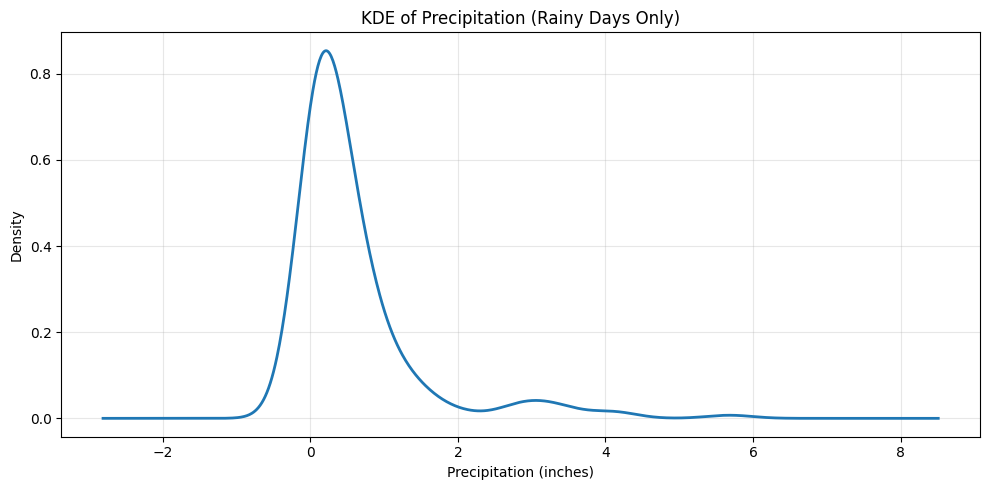

In [74]:
plt.figure(figsize=(10,5))
rainy_days.plot(kind = 'kde', linewidth = 2)
plt.xlabel("Precipitation (inches)")
plt.ylabel("Density")
plt.title("KDE of Precipitation (Rainy Days Only)")
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

**Describe one way of making your model better for forecasting and simulation the weather.**

One way of making the model better for forecasting is using a multi-state model with different categories for precipitation. Precipitation can be categorized as none, light, moderate, or heavy instead of just a binary rain/no rain.

**Congratulations, you now are a non-parametric meteorologist!**

## Question 4: Taxicab trajectories 
**Using the pickled taxicab data, we want to complete the exercise from class.**

- **For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.**


In [3]:
import pickle

In [4]:
with open("taxicab.pkl", 'rb') as f:
    data = pickle.load(f)

len(data)

1000

In [5]:
states = set(data[0])

In [6]:
for i in range(1, len(data)):
    new_trip =  data[i]
    new_states = set(new_trip)
    states = states.union(new_states)
states = list(states)

- **Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?**

In [7]:
tr_counts = np.zeros((len(states), len(states)))
for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        x_tm1 = seq[t-1]
        x_t = seq[t]
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        tr_counts[index_from, index_to] += 1
tr_counts

array([[9.80000e+02, 2.30000e+01, 6.00000e+01, ..., 3.30000e+01,
        2.00000e+01, 1.36400e+03],
       [3.30000e+01, 1.60010e+04, 1.03760e+04, ..., 5.56000e+02,
        4.63000e+02, 2.10500e+03],
       [1.74000e+02, 8.13900e+03, 8.80490e+04, ..., 2.65900e+03,
        2.10200e+03, 1.09410e+04],
       ...,
       [2.90000e+01, 6.80000e+02, 1.85300e+03, ..., 6.00930e+04,
        1.56800e+03, 7.18100e+03],
       [2.10000e+01, 6.12000e+02, 2.42000e+03, ..., 1.32300e+03,
        1.39800e+04, 1.90800e+03],
       [1.48400e+03, 1.94900e+03, 1.00100e+04, ..., 8.26000e+03,
        2.27800e+03, 3.46322e+05]], shape=(38, 38))

In [8]:
sums = tr_counts.sum(axis = 1, keepdims=True)
tr_pr = np.divide(tr_counts, sums, out = np.zeros_like(tr_counts), where = sums != 0)
tr_df = pd.DataFrame(np.round(tr_pr, 2), index = states, columns = states)
tr_df.head()

,Inwood,Stuyvesant Town,Gramercy,Washington Heights,East Village,Outside Manhattan,Roosevelt Island,Theater District,Chelsea,Tribeca,...,Central Park,Flatiron District,Midtown,Little Italy,Governors Island,Marble Hill,East Harlem,Battery Park City,Chinatown,Hell's Kitchen
Inwood,0.07,0.00,0.00,0.08,0.01,0.07,0.0,0.03,0.04,0.00,...,0.01,0.00,0.06,0.0,0.0,0.0,0.03,0.00,0.00,0.10
Stuyvesant Town,0.00,0.14,0.09,0.00,0.10,0.05,0.0,0.01,0.07,0.01,...,0.00,0.02,0.13,0.0,0.0,0.0,0.01,0.00,0.00,0.02
Gramercy,0.00,0.02,0.18,0.00,0.08,0.05,0.0,0.02,0.10,0.01,...,0.00,0.03,0.13,0.0,0.0,0.0,0.00,0.01,0.00,0.02
Washington Heights,0.01,0.00,0.00,0.15,0.01,0.06,0.0,0.02,0.03,0.00,...,0.01,0.00,0.05,0.0,0.0,0.0,0.02,0.00,0.00,0.07
East Village,0.00,0.02,0.07,0.00,0.27,0.08,0.0,0.01,0.07,0.01,...,0.00,0.02,0.09,0.0,0.0,0.0,0.01,0.01,0.01,0.02


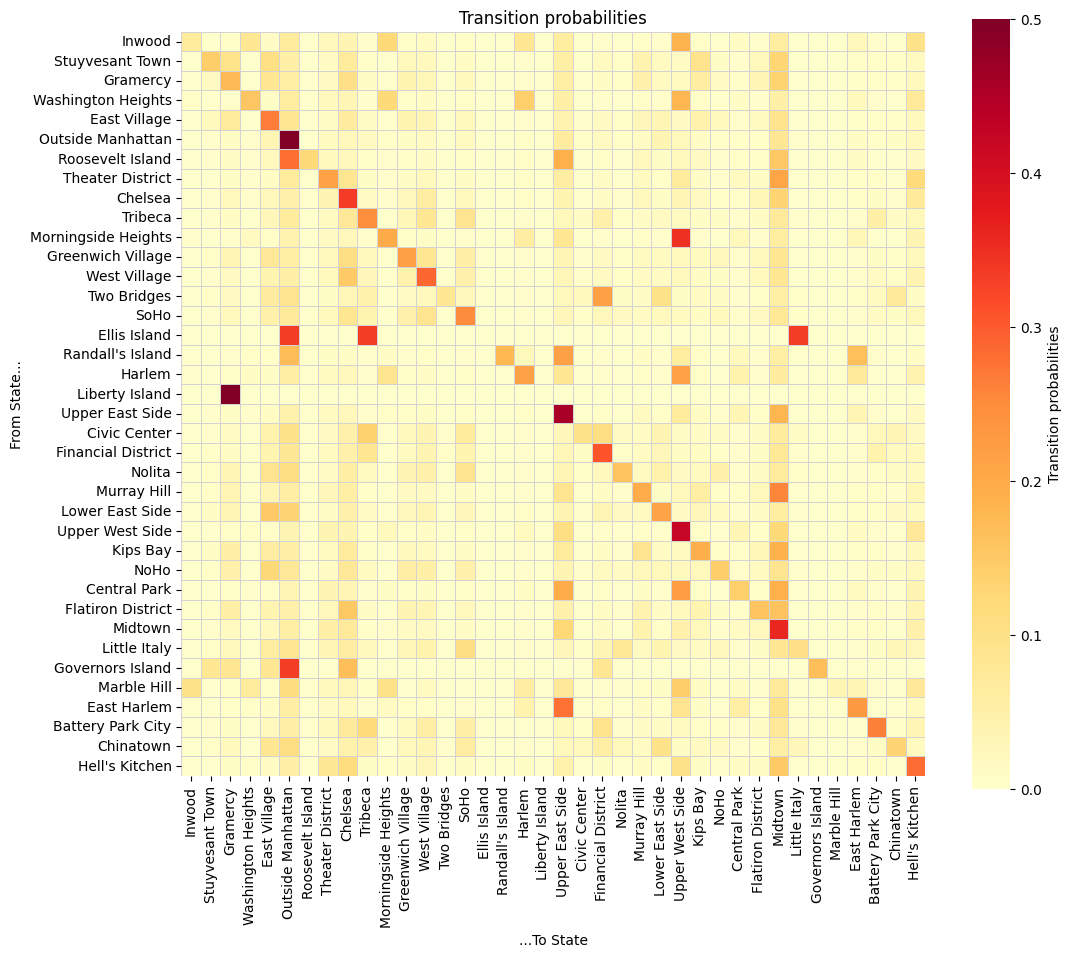

In [11]:
plt.figure(figsize=(12, 10))

sns.heatmap(tr_pr, 
            cmap = 'YlOrRd', 
            square=True, 
            xticklabels = states, 
            yticklabels = states, 
            cbar_kws={'label': 'Transition probabilities'},
            vmin=0, vmax=0.5,
            linewidths=0.5,
            linecolor='lightgray')

plt.title("Transition probabilities")
plt.xlabel("...To State")
plt.ylabel("From State...")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

plt.show()

In [14]:
transitions = []
for i in range(len(states)):
    for j in range(len(states)):
        if tr_counts[i, j] > 0:
            transitions.append({
                "from": states[i],
                "to": states[j],
                "count": int(tr_counts[i, j]),
                "prob": tr_pr[i, j]
            })
transitions_df = pd.DataFrame(transitions)
transitions_df = transitions_df.sort_values('count', ascending=False)

print(f"Top 10 Most Common Routes:")
for i, row in transitions_df.head(10).iterrows():
    print(f"{row['from']:20s} → {row['to']:20s} | Count: {row['count']:5.0f} | Prob: {row['prob']:.3f}")

Top 10 Most Common Routes:
Midtown              → Midtown              | Count: 1389343 | Prob: 0.361
Upper East Side      → Upper East Side      | Count: 1283151 | Prob: 0.459
Outside Manhattan    → Outside Manhattan    | Count: 1203902 | Prob: 0.509
Upper West Side      → Upper West Side      | Count: 763963 | Prob: 0.424
Chelsea              → Chelsea              | Count: 662397 | Prob: 0.335
Upper East Side      → Midtown              | Count: 507502 | Prob: 0.181
Midtown              → Upper East Side      | Count: 484395 | Prob: 0.126
Hell's Kitchen       → Hell's Kitchen       | Count: 346322 | Prob: 0.283
Midtown              → Chelsea              | Count: 278191 | Prob: 0.072
Chelsea              → Midtown              | Count: 260420 | Prob: 0.132


- **Explain why taxicabs are most likely order 1, and not 2 or more.**

Taxicabs are more likely order 1 and not 2 or more because a Markov chain is order 1 if the next state depends only on the current state, and not on the history of the previous states. Where a taxicab is going depends on where it is now, not where it came from, and each passenger is going to have a destination independent of the taxicab's prvious routes. The next location does not depend on the last two locations. SO taxicabs are more likely order 1.


- **Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips**


In [ ]:
start_state = "Hell's Kitchen"
start_state_index = states.index(start_state)
pi_0 = np.zeros(len(states))
pi_0[start_state_index] = 1

forecast_steps = [2, 3, 5, 10]

for i in forecast_steps:
    P_n = np.linalg.matrix_power(tr_pr, i)
    pi_n = pi_0 @ P_n

    print(f"\nAfter {n} trips:")
    

_IncompleteInputError: incomplete input (2452102080.py, line 8)

- **Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?**